<a href="https://colab.research.google.com/github/gikirima/TEA-emoji/blob/main/TEA_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LANGKAH 0: INSTALASI DAN IMPORT LIBRARY

## Menginstal library yang diperlukan dari Hugging Face dan Scikit-learn.

In [1]:
!pip install transformers datasets scikit-learn scikit-multilearn emoji torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import torch
import emoji
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# LANGKAH 1: MEMUAT DATASET

In [3]:
try:
    df = pd.read_csv('https://raw.githubusercontent.com/gikirima/TEA-emoji/refs/heads/main/dataset_emoji_only.csv')
    print("Dataset berhasil dimuat.")

except FileNotFoundError:
    print("Error: File tidak ditemukan.")
    print("Silakan unggah file tersebut terlebih dahulu.")
    # Hentikan eksekusi jika file tidak ada
    exit()

Dataset berhasil dimuat.


# LANGKAH 3: MEMUAT TOKENIZER DAN MODEL (Integrasi dari Untitled11.ipynb)

## Kita memuat model dan tokenizer dasar, lalu langsung menambahkan token emoji dan menyesuaikan ukuran embedding model.

In [4]:
model_name = "indobenchmark/indobert-base-p1"

# Tentukan kolom label Anda. Sesuaikan jika nama kolom di CSV Anda berbeda.
label_columns = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']

num_labels = len(label_columns)

print(f"\nMemuat tokenizer '{model_name}'...")
tokenizer = AutoTokenizer.from_pretrained(model_name)

print(f"Memuat model '{model_name}' untuk klasifikasi multi-label dengan {num_labels} label...")
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    problem_type="multi_label_classification" # Penting untuk klasifikasi multi-label
)

print("Tokenizer dan model baseline siap digunakan.")


Memuat tokenizer 'indobenchmark/indobert-base-p1'...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Memuat model 'indobenchmark/indobert-base-p1' untuk klasifikasi multi-label dengan 8 label...


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizer dan model siap digunakan dengan vocabulary emoji yang diperbarui.


# LANGKAH 4: PERSIAPAN DATASET UNTUK HUGGING FACE

## Mengubah format dari Pandas DataFrame menjadi Hugging Face Dataset.


Memulai pembagian dataset dengan metode iterative_train_test_split (PERBAIKAN)...


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]


Mengubah format DataFrame menjadi Hugging Face Dataset...

Melakukan tokenisasi dan pemformatan label pada semua set data...


Map:   0%|          | 0/89255 [00:00<?, ? examples/s]

Map:   0%|          | 0/89255 [00:00<?, ? examples/s]

Map:   0%|          | 0/22136 [00:00<?, ? examples/s]

Map:   0%|          | 0/22136 [00:00<?, ? examples/s]

Map:   0%|          | 0/28023 [00:00<?, ? examples/s]

Map:   0%|          | 0/28023 [00:00<?, ? examples/s]


--- Pembagian Data Selesai (Hasil Seharusnya Benar) ---
Jumlah data latih (train): 89255 (Target: ~64%)
Jumlah data validasi (validation): 22136 (Target: ~16%)
Jumlah data uji (test): 28023 (Target: ~20%)
Total: 139414

Menghitung dan menampilkan distribusi label di setiap set data...


/tmp/ipython-input-1517451917.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_df.index, y='Train', data=dist_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-1517451917.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_df.index, y='Validation', data=dist_df, ax=axes[1], palette='viridis')
/tmp/ipython-input-1517451917.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_df.index, y='Test', data=dist_df, ax=axes[2], palette='viridis')


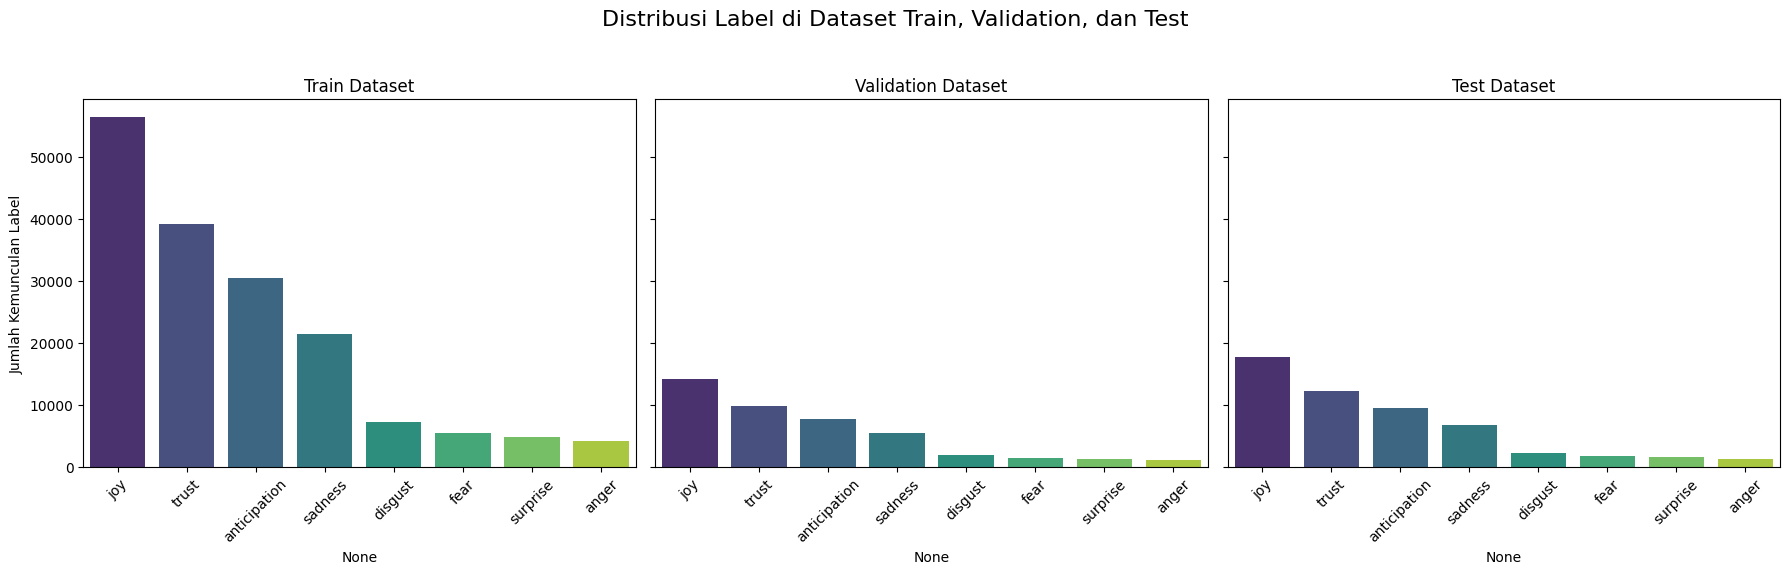


Distribusi label berhasil ditampilkan.


In [5]:
# Pastikan Anda sudah menginstal scikit-multilearn
# !pip install scikit-multilearn --quiet
from skmultilearn.model_selection import iterative_train_test_split
import numpy as np
import pandas as pd

print("\nMemulai pembagian dataset dengan metode iterative_train_test_split...")

# Definisikan kolom fitur (X) dan label (y)
label_columns = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']

# Penting: Konversi kolom teks dan label ke format numpy untuk splitter
X = df['text'].to_numpy().reshape(-1, 1)
y = df[label_columns].to_numpy()


# --- Pembagian Data yang Benar ---

# 1. Pisahkan 20% data untuk set tes (unseen data)
# Fungsi ini mengembalikan X dan y untuk masing-masing set
X_train_val, y_train_val, X_test, y_test = iterative_train_test_split(X, y, test_size=0.2)

# 2. Pisahkan sisa 80% (train_val) menjadi data latih (train) dan validasi (validation)
# Proporsi untuk validasi dari sisa data adalah 0.16 / 0.80 = 0.2
X_train, y_train, X_val, y_val = iterative_train_test_split(X_train_val, y_train_val, test_size=0.2)

# --- Rekonstruksi DataFrame dari hasil split ---
# Kita perlu mengubah kembali hasil split (numpy array) menjadi Pandas DataFrame
# untuk digunakan oleh library 'datasets'

# Membuat DataFrame train
df_train = pd.DataFrame(X_train.flatten(), columns=['text'])
for i, col in enumerate(label_columns):
    df_train[col] = y_train[:, i]

# Membuat DataFrame validasi
df_val = pd.DataFrame(X_val.flatten(), columns=['text'])
for i, col in enumerate(label_columns):
    df_val[col] = y_val[:, i]

# Membuat DataFrame test
df_test = pd.DataFrame(X_test.flatten(), columns=['text'])
for i, col in enumerate(label_columns):
    df_test[col] = y_test[:, i]

# --- Konversi ke Hugging Face Dataset ---
print("\nMengubah format DataFrame menjadi Hugging Face Dataset...")
train_dataset_hf = Dataset.from_pandas(df_train)
eval_dataset_hf = Dataset.from_pandas(df_val)
test_dataset_hf = Dataset.from_pandas(df_test)

# --- Tokenisasi dan Pemrosesan (diterapkan ke setiap dataset) ---
# Fungsi untuk tokenisasi teks
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Fungsi untuk memformat kolom label
def format_labels(example):
    example["labels"] = [float(example[label]) for label in label_columns]
    return example

print("\nMelakukan tokenisasi dan pemformatan label pada semua set data...")
train_dataset = train_dataset_hf.map(tokenize_function, batched=True).map(format_labels)
eval_dataset = eval_dataset_hf.map(tokenize_function, batched=True).map(format_labels)
test_dataset = test_dataset_hf.map(tokenize_function, batched=True).map(format_labels)


print("\n--- Pembagian Data Selesai (Hasil Seharusnya Benar) ---")
print(f"Jumlah data latih (train): {len(train_dataset)} (Target: ~64%)")
print(f"Jumlah data validasi (validation): {len(eval_dataset)} (Target: ~16%)")
print(f"Jumlah data uji (test): {len(test_dataset)} (Target: ~20%)")
print(f"Total: {len(train_dataset) + len(eval_dataset) + len(test_dataset)}")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("\nMenghitung dan menampilkan distribusi label di setiap set data...")

def get_label_distribution(dataset_hf, label_columns):
    """Menghitung jumlah kemunculan setiap label dalam dataset Hugging Face."""
    df = dataset_hf.to_pandas()
    distribution = df[label_columns].sum().sort_values(ascending=False)
    return distribution

# Hitung distribusi untuk setiap set
train_label_dist = get_label_distribution(train_dataset_hf, label_columns)
eval_label_dist = get_label_distribution(eval_dataset_hf, label_columns)
test_label_dist = get_label_distribution(test_dataset_hf, label_columns)

# Buat DataFrame gabungan untuk plotting
dist_df = pd.DataFrame({
    'Train': train_label_dist,
    'Validation': eval_label_dist,
    'Test': test_label_dist
})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Distribusi Label di Dataset Train, Validation, dan Test', fontsize=16)

# Plot Train
sns.barplot(x=dist_df.index, y='Train', data=dist_df, ax=axes[0], palette='viridis')
axes[0].set_title('Train Dataset')
axes[0].set_ylabel('Jumlah Kemunculan Label')
axes[0].tick_params(axis='x', rotation=45)

# Plot Validation
sns.barplot(x=dist_df.index, y='Validation', data=dist_df, ax=axes[1], palette='viridis')
axes[1].set_title('Validation Dataset')
axes[1].set_ylabel('') # Hide y-label as it's shared
axes[1].tick_params(axis='x', rotation=45)

# Plot Test
sns.barplot(x=dist_df.index, y='Test', data=dist_df, ax=axes[2], palette='viridis')
axes[2].set_title('Test Dataset')
axes[2].set_ylabel('') # Hide y-label as it's shared
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("\nDistribusi label berhasil ditampilkan.")

# LANGKAH 5: MENDEFINISIKAN METRIK EVALUASI
## Fungsi ini akan menghitung metrik performa model saat evaluasi.

In [6]:
def compute_metrics(p):
    logits, labels = p
    # Menggunakan sigmoid karena ini adalah klasifikasi multi-label
    preds_proba = torch.sigmoid(torch.tensor(logits))
    # Threshold 0.5 untuk menentukan apakah label aktif (1) atau tidak (0)
    preds = (preds_proba > 0.5).int().numpy()
    labels = labels.astype(int)

    f1_micro = f1_score(labels, preds, average='micro')
    f1_macro = f1_score(labels, preds, average='macro')
    precision_micro = precision_score(labels, preds, average='micro')
    recall_micro = recall_score(labels, preds, average='micro')

    return {
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'precision_micro': precision_micro,
        'recall_micro': recall_micro,
        'accuracy': accuracy_score(labels, preds), # Accuracy berbasis exact match
    }

# LANGKAH 6: KONFIGURASI DAN PROSES TRAINING

## Menentukan argumen pelatihan dan memulai proses fine-tuning.

In [ ]:
# WANDB integration for experiment tracking.
try:
    from google.colab import userdata
    wandb_api_key = userdata.get('WANDB_API_KEY')
    import wandb
    if wandb_api_key:
        wandb.login(key=wandb_api_key)
        print("WANDB login successful.")
        wandb.init(
            project="baseline_model_Training",
            name="baseline_model_run_1",
        )
        report_to = "wandb"
    else:
        print("WANDB_API key not found. Skipping WANDB logging.")
        report_to = "none"
except (ImportError, KeyError):
    print("Not in Colab or WANDB key not set. Skipping WANDB logging.")
    report_to = "none"


training_args = TrainingArguments(
    # --- Direktori & Strategi ---
    output_dir="./results",
    eval_strategy="steps",          # Evaluasi per step
    save_strategy="steps",          # Simpan checkpoint per step
    load_best_model_at_end=True,   # Muat model terbaik di akhir
    metric_for_best_model="f1_macro",
    greater_is_better=True,         # f1_macro yang lebih tinggi lebih baik

    # --- Frekuensi Step ---
    logging_steps=250,             # Catat log setiap 250 steps
    eval_steps=1500,         # Evaluasi setiap 1500 steps
    save_steps=1500,               # Simpan checkpoint setiap 1500 steps
    save_total_limit=3,            # Simpan maksimal 3 checkpoint (termasuk yg terbaik)

    # --- Hyperparameter Training ---
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=3e-5,            # Learning rate yang umum untuk fine-tuning BERT
    warmup_steps=500,              # Pemanasan untuk menstabilkan training
    weight_decay=0.01,             # Regularisasi untuk mencegah overfitting

    # --- Optimasi Performa ---
    fp16=True,                     # Aktifkan mixed precision (mempercepat training di GPU T4/V100)
    report_to="wandb"              # Jika Anda menggunakan W&B untuk logging
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)



print("\nMemulai proses fine-tuning model...")
trainer.train()

print("\nPelatihan selesai.")

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: farhanprwnto (farhanprwnto-universitas-sumatera-utara) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


WANDB login successful.


/tmp/ipython-input-773823123.py:50: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Memulai proses fine-tuning model...


Step,Training Loss,Validation Loss,F1 Macro,F1 Micro,Precision Micro,Recall Micro,Accuracy
1500,0.281500,0.275338,0.586057,0.756007,0.751699,0.760365,0.445202


# LANGKAH 7: EVALUASI AKHIR
## Mengevaluasi model terbaik pada data uji.

In [ ]:
print("\nMengevaluasi model terbaik pada test set...")
evaluation_results = trainer.evaluate()

print("\nHasil Evaluasi Akhir:")
print(evaluation_results)

import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan Anda menggunakan test_dataset yang sudah dibuat pada LANGKAH 4
print("Melakukan prediksi pada test set untuk membuat confusion matrix...")
prediction_output = trainer.predict(test_dataset)

# Ambil logits (output mentah model) dan label sebenarnya
logits = prediction_output.predictions
true_labels = prediction_output.label_ids

# Ubah logits menjadi prediksi biner (0 atau 1) menggunakan threshold 0.5
# Ini adalah logika yang sama dengan yang ada di fungsi compute_metrics Anda
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(torch.from_numpy(logits))
predictions = (probs > 0.5).int().numpy()

# Ambil daftar nama kolom label yang sudah didefinisikan sebelumnya
# Misal: label_columns = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']

# Siapkan grid plot untuk menampilkan 8 confusion matrix (2 baris, 4 kolom)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten() # Ubah grid 2x4 menjadi array 1D agar mudah di-loop

# Loop melalui setiap label untuk membuat confusion matrix-nya
for i, label_name in enumerate(label_columns):
    # Hitung confusion matrix untuk label ke-i
    cm = confusion_matrix(
        y_true=true_labels[:, i],  # Label sebenarnya untuk emosi ini
        y_pred=predictions[:, i]   # Prediksi model untuk emosi ini
    )

    # Visualisasikan sebagai heatmap menggunakan Seaborn
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Tidak Ada', 'Ada'], yticklabels=['Tidak Ada', 'Ada'])

    ax.set_title(f"Confusion Matrix untuk: {label_name.title()}", fontweight='bold')
    ax.set_xlabel('Prediksi Model')
    ax.set_ylabel('Label Sebenarnya')

# Atur layout agar rapi dan tidak tumpang tindih
plt.tight_layout()
plt.show()

# LANGKAH 8: MENYIMPAN MODEL DAN TOKENIZER FINAL
## Menyimpan model yang sudah di-fine-tuning untuk digunakan nanti.

In [ ]:
final_model_path = "./fine_tuned_indobert_emoji"
print(f"\nMenyimpan model dan tokenizer final ke '{final_model_path}'...")
trainer.save_model(final_model_path)
tokenizer.save_pretrained(final_model_path)
print("Model dan tokenizer berhasil disimpan.")

from google.colab import drive
import os

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Tentukan path untuk menyimpan model di Google Drive
# Pastikan folder 'training 1' ada di root Google Drive Anda atau sesuaikan path
drive_save_path = "/content/drive/MyDrive/fine_tuned_indobert_baseline/training 1"

# Buat direktori jika belum ada
if not os.path.exists(drive_save_path):
    os.makedirs(drive_save_path)
    print(f"Direktori '{drive_save_path}' dibuat.")
else:
    print(f"Direktori '{drive_save_path}' sudah ada.")

# Menyimpan model dan tokenizer final ke Google Drive
print(f"\nMenyimpan model dan tokenizer final ke '{drive_save_path}'...")
trainer.save_model(drive_save_path)
tokenizer.save_pretrained(drive_save_path)
print("Model dan tokenizer berhasil disimpan di Google Drive.")